<a href="https://colab.research.google.com/github/komalk98/timeseries_female_birth_data/blob/main/timeseries_female_birth_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 


In [ ]:
bir = pd.read_csv('/content/sample_data/daily-total-female-births-CA.csv',index_col=[0], parse_dates=[0])

In [ ]:
bir.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [ ]:
bir.shape

(365, 1)

In [ ]:
type(bir)

pandas.core.frame.DataFrame

In [ ]:
sval = bir.values
type(sval) 

numpy.ndarray

In [ ]:
bir.size

365

In [ ]:
bir.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [ ]:
bir.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


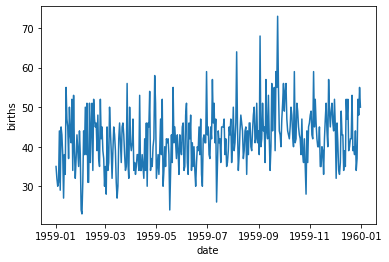

In [ ]:
plt.xlabel('date')
plt.ylabel('births')
plt.plot(bir)

In [ ]:
birmean = bir.rolling(window=20).mean()


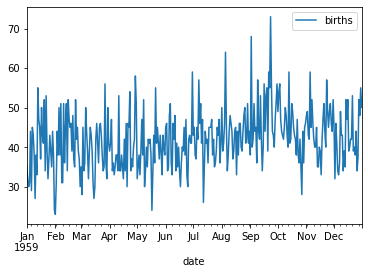

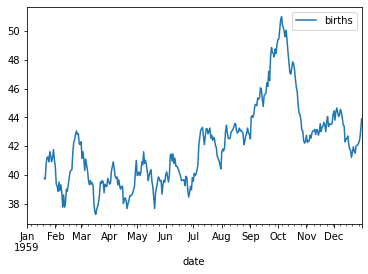

In [ ]:
bir.plot()
birmean.plot() 

shift() method will not work for data series so we have to convert it to dataframe and hen we can use that variable to use with shift method 

In [ ]:
value = pd.DataFrame(sval)

In [ ]:
birdf = pd.concat([value,value.shift(1)], axis=1) 

now we got a dataframe where we took the value if first column and performed t+1 operation so one more column will be created and will contain concate values  

In [ ]:
birdf.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


if we see in dataframe for our data there is no column name so we need to asign the column name actual birth and predicted birth 

In [ ]:
birdf.columns = ['actual_birth','Predicted_birth']


In [ ]:
birdf.head()

,actual_birth,Predicted_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [ ]:
btest = birdf[1:]

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
btest.tail() 

,actual_birth,Predicted_birth
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0
364,50,55.0


In [ ]:
berror = mean_squared_error(btest.actual_birth,btest.Predicted_birth)

In [ ]:
berror

84.22252747252747

In [ ]:
np.sqrt(berror)

9.177283229394606

whatever value we got (9.17) will be a basline, there can be a +- of 9 births error each day
   

In [ ]:
# now we will use ARIMA model 

In [ ]:
# auto regressive = current value is corelated with previous value
# intergration = it is a diffrence between 2 values 
# moving average = 

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


plot_acf is to identify parameter q 
arima (p-AR,d-integration,q-MA)

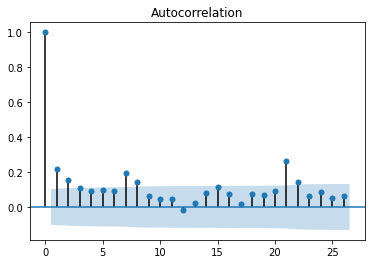

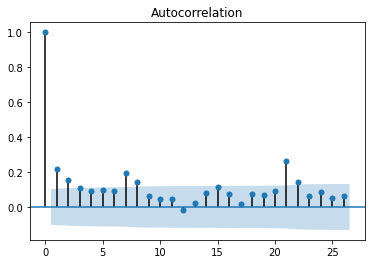

In [ ]:
plot_acf(bir)

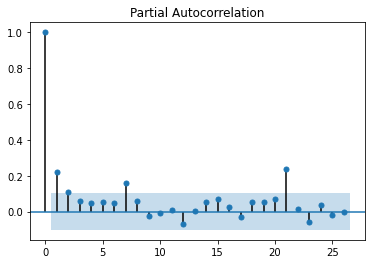

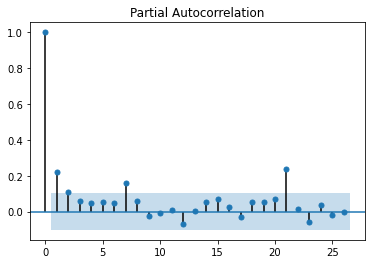

In [ ]:
plot_pacf(bir)